# Digital Image Processing: Basics

## 1. Loading modules

In [285]:
import cv2
import ipywidgets as widgets
import numpy as np
import os

from glob import glob

from ipywidgets import interact, interactive, fixed
from IPython.display import display

from matplotlib import pyplot as plt

%matplotlib inline

## 2. Load and visualize images.

All this code is not necessary. I was just playing with ipywidgets (:

### Getting list of images from folder

In [56]:
folder_name = 'images'
images_list = glob('{0}/*'.format(folder_name))

# Removing folder name and extension.
images_list = [i.split('/')[1] for i in images_list]

print(images_list)

['cameraman.png', 'moon.jpg', 'rose.bmp', 'skull.bmp', 'Woman.bmp']


### Image selection from dropdown menu Handler

In [183]:
def select_img(img_name, display):
    img = cv2.imread(os.path.join(folder_name, img_name), cv2.IMREAD_GRAYSCALE)
    print("Loaded image {0}".format(img_name))
    print("Image resolution: {0}".format(img.shape))

    if display:
        plt.axis('off');plt.imshow(img, cmap='gray');

    return img

### Creating widget for image selection and visualization

In [176]:
img_widget = widgets.Dropdown(
    options=images_list,
    description='Images',
    disabled=False
)

w = interactive(select_img, display=True, img_name=img_widget);

### Image copy handler

In [175]:
def save_copy(b):
    folder_name = 'img_copies'
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)

    # Saving image.
    file_name = w.children[0].value
    split_filename = file_name.split('.')
    output_name = '{0}_copy.{1}'.format(split_filename[0], split_filename[1])
    print('Saved to {0}'.format(output_name))
    
    #TODO: cv2.imwrite them..

### Defining Copy button

In [173]:
copy_button = widgets.Button(
    description='Save Copy',
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
)
copy_button.on_click(save_copy)

### Render widgets

In [314]:
display(w)
display(copy_button)

interactive(children=(FloatSlider(value=0.0, description='gamma', max=1.0), IntSlider(value=1, description='c', max=3, min=-1), Output()), _dom_classes=('widget-interact',))

Button(description='Save Copy', style=ButtonStyle())

## 3. Image operations

### Negative of an image

In [184]:
def img_negative(img):
    height, width = img.shape
    neg_img = img.copy()
    for row in range(height):
        for column in range(width):
            neg_img[row][column] = 255 - neg_img[row][column]

    # An easier approach could be only neg_img = 255 - img
    return neg_img

Displaying results

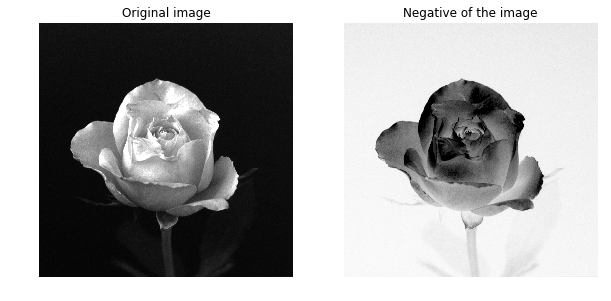

In [190]:
img = cv2.imread('images/rose.bmp', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off')
plt.title('Original image');

plt.subplot(1, 2, 2)
plt.imshow(img_negative(img), cmap='gray'); plt.axis('off')
plt.title('Negative of the image');

### Image flip

Reading image and creating zero matrices with same image shape

In [226]:
img = cv2.imread('images/Woman.bmp', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
img_horz_flip = np.zeros(img.shape)
img_vert_flip = np.zeros(img.shape)

Performing horizontal and vertical flipping.

In [229]:
# Horizontal flip
for column in range(width):
    img_horz_flip[:, column] = img[:, -1-column]

# Vertical flip
for row in range(height):
    img_vert_flip[row, :] = img[-1-row, :]

Displaying results

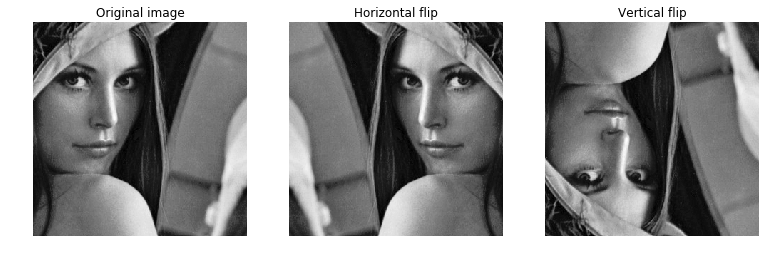

In [231]:
plt.figure(figsize=(13, 13))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray'); plt.axis('off')
plt.title('Original image');

plt.subplot(1, 3, 2)
plt.imshow(img_horz_flip, cmap='gray'); plt.axis('off')
plt.title('Horizontal flip');

plt.subplot(1, 3, 3)
plt.imshow(img_vert_flip, cmap='gray'); plt.axis('off')
plt.title('Vertical flip');

### Power transformation

$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$


In [313]:
#slider = widgets.FloatSlider()
def img_power(img, gamma, c):
    norm_img = img / 255
    out_img = c * np.power(norm_img, gamma)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray'); plt.axis('off')
    plt.title('Original image');

    plt.subplot(1, 2, 2)
    plt.imshow(out_img, cmap='gray'); plt.axis('off')
    plt.title('Gamma transformation');    
    
    
img = cv2.imread('images/spine.jpg', cv2.IMREAD_GRAYSCALE)
gamma_slider = widgets.FloatSlider(min=0.0, max=1.0, value=0.5, step=0.1, description='gamma')
interact(img_power, img=fixed(img), gamma=gamma_slider, c=fixed(1));


interactive(children=(FloatSlider(value=0.5, description='gamma', max=1.0), Output()), _dom_classes=('widget-interact',))